In [1]:
import pickle 
import numpy as np

In [3]:
with open(r"C:\Users\NIhar\Desktop\train_qa-220120-145526.txt","rb") as fp:
    train_data = pickle.load(fp)

In [4]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [5]:
with open(r"C:\Users\NIhar\Desktop\test_qa-220120-145430.txt","rb") as fp:
    test_data = pickle.load(fp)

In [6]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [8]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
vocab = set()

In [13]:
all_data = test_data+train_data

In [14]:
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
vocab.add("yes")
vocab.add("no")

In [15]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [16]:
vocab_len = len(vocab)+1

In [20]:
max_story_len = max([len(data[0]) for data in all_data])
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
## vectorize the dataset 
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer(filters=[])

In [23]:
tokenizer.fit_on_texts(vocab)

In [24]:
tokenizer.word_index

{'travelled': 1,
 'football': 2,
 'bathroom': 3,
 'no': 4,
 'garden': 5,
 'took': 6,
 'went': 7,
 'the': 8,
 'left': 9,
 'office': 10,
 'there': 11,
 'is': 12,
 '?': 13,
 'back': 14,
 '.': 15,
 'in': 16,
 'discarded': 17,
 'journeyed': 18,
 'milk': 19,
 'down': 20,
 'picked': 21,
 'moved': 22,
 'dropped': 23,
 'apple': 24,
 'john': 25,
 'grabbed': 26,
 'bedroom': 27,
 'mary': 28,
 'sandra': 29,
 'daniel': 30,
 'up': 31,
 'hallway': 32,
 'put': 33,
 'to': 34,
 'yes': 35,
 'kitchen': 36,
 'got': 37}

In [25]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [27]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [39]:
def vectorize_stories(data,word_index = tokenizer.word_index,
                      max_story_len = max_story_len,max_ques_len = max_question_len):
    X = [] # story
    Xq = [] #question
    Y = [] #answer
    for story,ques,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in ques]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X,maxlen = max_story_len),
            pad_sequences(Xq,maxlen = max_question_len),
            np.array(Y))

In [40]:
input_train,queries_train,answer_train = vectorize_stories(train_data)

In [41]:
input_test,queries_test,answer_test = vectorize_stories(test_data)

In [42]:
tokenizer.word_index['yes']

35

In [43]:
tokenizer.word_index['no']

4

In [36]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [45]:
input_sequense = Input((max_story_len,))
question = Input((max_question_len,))

In [44]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len,output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [46]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len,output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [48]:
## Question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len,output_dim = 64,input_length = max_question_len))
question_encoder.add(Dropout(0.3))

In [56]:
## encode the sequences 
input_encoded_m = input_encoder_m(input_sequense)
input_encoded_c = input_encoder_c(input_sequense)
question_encoded = question_encoder(question)

In [57]:
match = dot([input_encoded_m,question_encoded],axes = (2,2))
match = Activation('softmax')(match)

In [58]:
response = add([match , input_encoded_c])
response = Permute((2,1))(response)

In [59]:
answer = concatenate([response,question_encoded])

In [61]:
answer = LSTM(32)(answer)

In [62]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [63]:
answer = Activation('softmax')(answer)

In [68]:
model = Model([input_sequense, question],answer)
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [69]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_4[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 6, 64)        2432        ['input_5[0][0]']                
                                                                                            

In [75]:
history = model.fit([input_train,queries_train],answer_train,batch_size = 32 , epochs = 30,
                   validation_data = ([input_test,queries_test],answer_test))

Epoch 1/30
313/313 [==============================] - 6s 18ms/step - loss: 0.6897 - accuracy: 0.5262 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 2/30
313/313 [==============================] - 6s 18ms/step - loss: 0.6691 - accuracy: 0.5753 - val_loss: 0.6507 - val_accuracy: 0.6090
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 0.6195 - accuracy: 0.6501 - val_loss: 0.5739 - val_accuracy: 0.7140
Epoch 4/30
313/313 [==============================] - 6s 19ms/step - loss: 0.5797 - accuracy: 0.6983 - val_loss: 0.5494 - val_accuracy: 0.7290
Epoch 5/30
313/313 [==============================] - 6s 19ms/step - loss: 0.5397 - accuracy: 0.7328 - val_loss: 0.5145 - val_accuracy: 0.7540
Epoch 6/30
313/313 [==============================] - 6s 20ms/step - loss: 0.5150 - accuracy: 0.7582 - val_loss: 0.4712 - val_accuracy: 0.7800
Epoch 7/30
313/313 [==============================] - 6s 20ms/step - loss: 0.4881 - accuracy: 0.7765 - val_loss: 0.4886 - val_accuracy: 0.7590

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


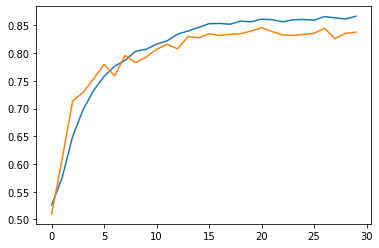

In [76]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

In [77]:
## save the model 
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets
D:\ANACONDA\envs\notebook\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
D:\ANACONDA\envs\notebook\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [78]:
model.load_weights("chatbot_model")

In [79]:
pred_result = model.predict([input_test,queries_test])

In [83]:
story = ' '.join(word for word in test_data[0][0])
story

'Mary got the milk there . John moved to the bedroom .'

In [84]:
query = ' '.join(word for word in test_data[0][1])
query

'Is John in the kitchen ?'

In [85]:
test_data[0][2]

'no'

In [87]:
val_max = np.argmax(pred_result[23])
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print('predicted ans ' , k)
print('prob of certainity ' , pred_result[23][val_max])

predicted ans  no
prob of certainity  0.998863


In [88]:
## story create by us 
story = "mary dropped the football . Sandra discarded apple in kitchen"
story.split()

['mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [101]:
my_question = "mary dropped the football ? "
my_question.split()

['mary', 'dropped', 'the', 'football', '?']

In [102]:
mydata = [(story.split(),my_question.split(),'yes')]

In [103]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [104]:
pred_res = model.predict([my_story,my_ques])

In [105]:
val_max = np.argmax(pred_result[0])
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print('predicted ans ' , k)
print('prob of certainity ' , pred_result[0][val_max])

predicted ans  no
prob of certainity  0.9992636
